# 01 Datasets
> Collection of toy datasets and single-cell RNA Velocity data for experimentation and testing our directed graph embedder.

In [ ]:
# default_exp datasets
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

This notebook contains examples of each of our datasets. We encourage other researchers to reuse them! Consider this a miniature rival of the wonderful "TADAsets" library from sklearn.

## Graph datasets

Processing...
Done!


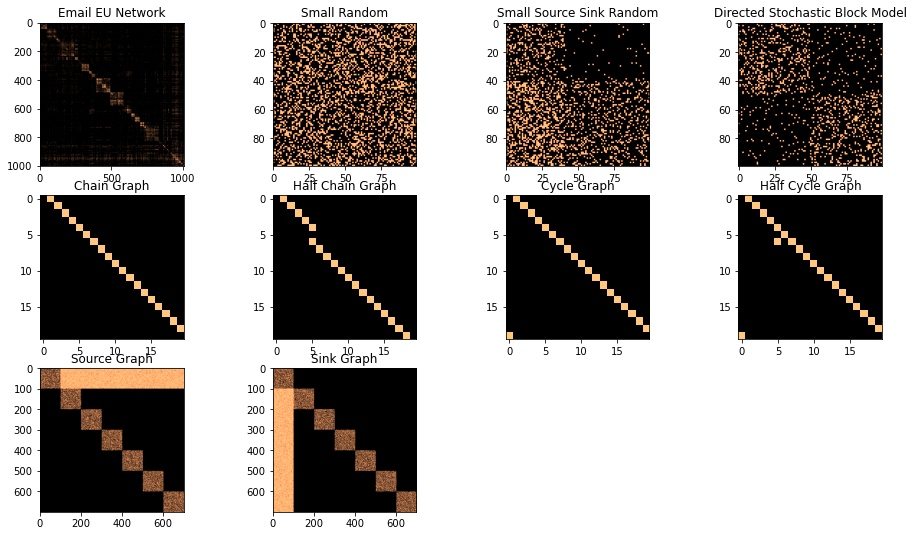

In [ ]:
# hide_input
from FRED.graph_datasets import (
    display_heatmap_galary, display_graph_galary,
    EmailEuNetwork, SourceSink, SmallRandom,
    ChainGraph, HalfChainGraph, CycleGraph, HalfCycleGraph,
    DirectedStochasticBlockModel, source_graph, sink_graph
)

dataset = [
    ("Email EU Network"                 , EmailEuNetwork()[0]),
    ("Small Random"                     , SmallRandom(num_nodes=100, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=100, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Directed Stochastic Block Model"  , DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, 
                                            aij=np.array([[0.4, 0.1], [0.1, 0.4]]), 
                                            bij=np.array([[0.5, 0.5], [0.5, 0.5]])
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=20)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=20, center=5)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=20)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=20, center=5)[0]),
    ("Source Graph"                     , source_graph()[0]),
    ("Sink Graph"                       , sink_graph()[0])
]
display_heatmap_galary(dataset)

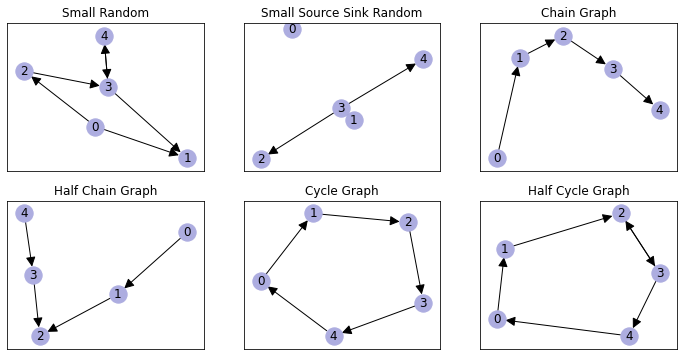

In [ ]:
# hide_input
dataset = [
    ("Small Random"                     , SmallRandom(num_nodes=5, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=5, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=5)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=5, center=2)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=5)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=5, center=2)[0]),
]
display_graph_galary(dataset, ncol=3)

## Manifold datasets

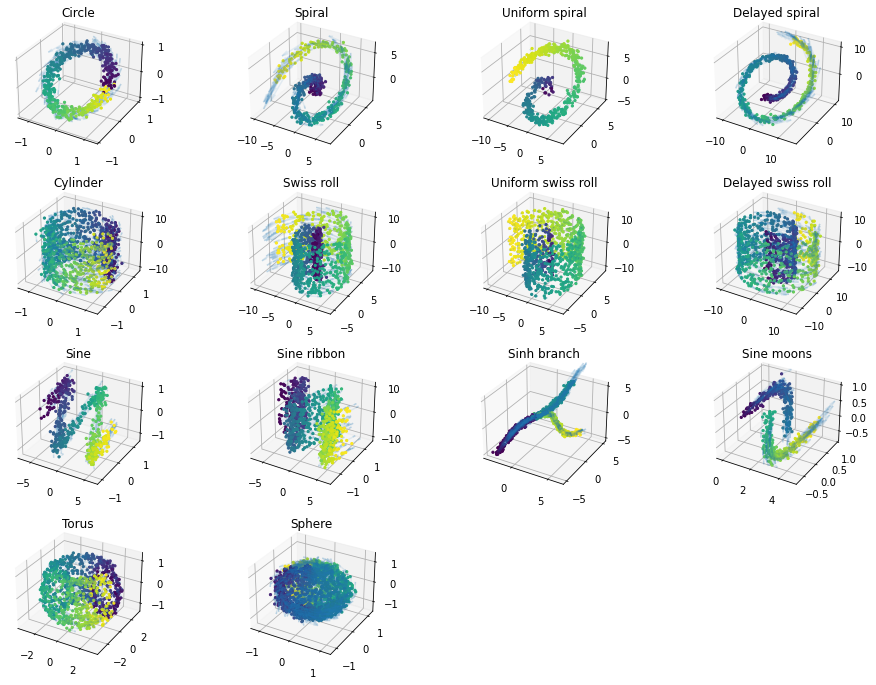

In [ ]:
# hide_input
from FRED.datasets import (
    display_flow_galary,
    directed_circle, directed_spiral, directed_spiral_uniform, directed_spiral_delayed,
    directed_cylinder, directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_delayed,
    directed_sine, directed_sine_ribbon, directed_sinh_branch, directed_sine_moons,
    directed_torus, directed_sphere
)

dataset = [
    ("Circle"               , directed_circle(xtilt=np.pi/4, sigma=0.1)         ),
    ("Spiral"               , directed_spiral(xtilt=np.pi/4, sigma=0.5)         ),
    ("Uniform spiral"       , directed_spiral_uniform(xtilt=np.pi/4, sigma=0.5),),
    ("Delayed spiral"       , directed_spiral_delayed(xtilt=np.pi/4, sigma=0.5),),
    ("Cylinder"             , directed_cylinder(sigma=0.1),                     ),
    ("Swiss roll"           , directed_swiss_roll(sigma=0.3),                   ),
    ("Uniform swiss roll"   , directed_swiss_roll_uniform(sigma=0.3),           ),
    ("Delayed swiss roll"   , directed_swiss_roll_delayed(sigma=0.3),           ),
    ("Sine"                 , directed_sine(xtilt=np.pi/4, sigma=0.2),          ),
    ("Sine ribbon"          , directed_sine_ribbon(sigma=0.2),                  ),
    ("Sinh branch"          , directed_sinh_branch(xtilt=np.pi/4, sigma=0.2),   ),
    ("Sine moons"           , directed_sine_moons(xtilt=np.pi/4, sigma=0.1),    ),
    ("Torus"                , directed_torus(noise=0.1),                        ),
    ("Sphere"               , directed_sphere(noise=0.1)                        )
]
display_flow_galary(dataset)

## Single-cell datasets


pancreas

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:15) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:01:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


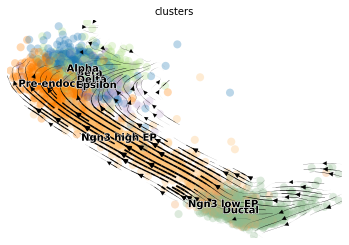


bonemarrow

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:05) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:13) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/5780 [00:00<?, ?cells/s]

    finished (0:01:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


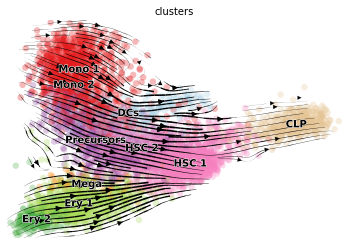


dentategyrus

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:33) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


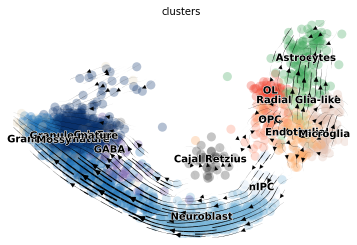


dentategyrus_lamanno

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:25) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:18) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:02:53) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/18213 [00:00<?, ?cells/s]

    finished (0:10:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:10) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


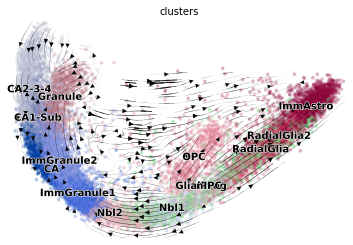

In [ ]:
# hide_input
import scvelo as scv
from FRED.datasets import rnavelo_plot_pca

datanames = ["pancreas", "bonemarrow", "dentategyrus", "dentategyrus_lamanno"]
for name in datanames:
    print(f"\n{'='*50}\n{name}\n{'='*50}\n")
    adata = getattr(scv.datasets, name)()
    rnavelo_plot_pca(adata)


gastrulation_e75

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:10) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:01:52) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/7202 [00:00<?, ?cells/s]

    finished (0:01:50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:05) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


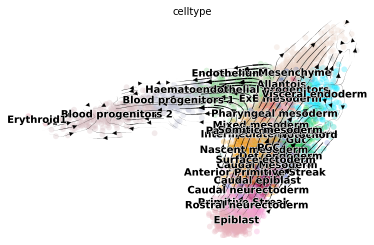


gastrulation_erythroid

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:26) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:02:50) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:55) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:08) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


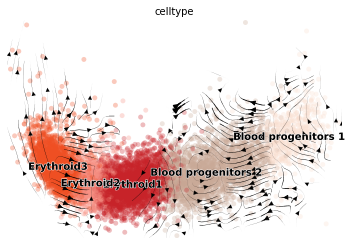


forebrain

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/1720 [00:00<?, ?cells/s]

    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


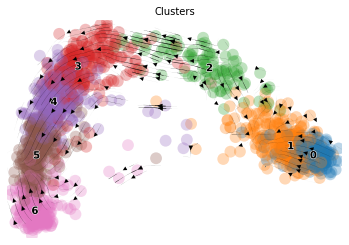

In [ ]:
# hide_input
import scvelo as scv
from FRED.datasets import rnavelo_plot_pca

datanames = ["gastrulation_e75", "gastrulation_erythroid", "forebrain"]
for name in datanames:
    print(f"\n{'='*50}\n{name}\n{'='*50}\n")
    adata = getattr(scv.datasets, name)()
    rnavelo_plot_pca(adata)


simulation 1

Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


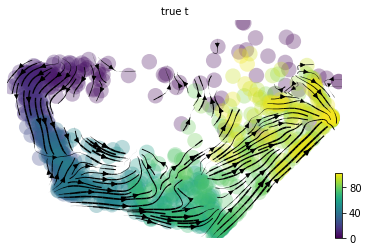


simulation 2

Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


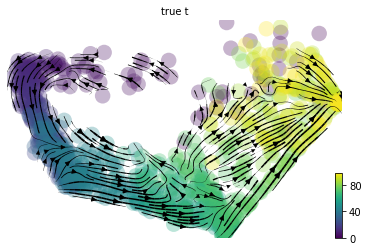


simulation 3

Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/1000 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


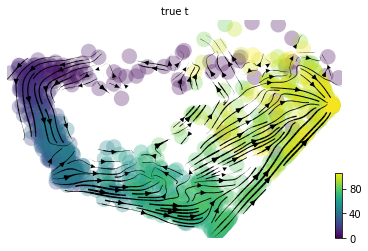

In [ ]:
# hide_input
import scvelo as scv
from FRED.datasets import rnavelo_plot_pca

for i in range(3):
    print(f"\n{'='*50}\nsimulation {i+1}\n{'='*50}\n")
    adata = scv.datasets.simulation(n_obs=1000, random_seed=i*10)
    rnavelo_plot_pca(adata)